# Predict red wine quality score with regession

#### My goal is to create a simple model that I can use to practice training and deploying to production. 

#### As a novice wine enthusist, I thought it would be nice to have a tool that could save me the embarrasment of staring at shelves of wine, searching for a "good one" at my local wine shop. Something that could predict the quality of wine based on attributes i can see at the store might save me. 

##### To accomplish this, I downloaded the red wine qualidy data set from UCI on Kaggle https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

### Import data and check it out

In [2]:
import pandas as pd

data = pd.read_csv('/Users/jonathanhirko/Documents/GitHub/winesite/analysis/winequality-red.csv')
df=pd.DataFrame(data)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#check summary information about data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##### Our focus will be on predicting the quality column above. Because quality is continuous, a good basic approach here might be to do a linear regression. A key part of that model is to determine which of these variables we should include though. 

### Check basic correlation

#### My initial instinct is that many of these variables wont be great predictors. Plus many of these variables can be observed by me in the store. I want to next check the correlation of these varibles to see if any stick out. 

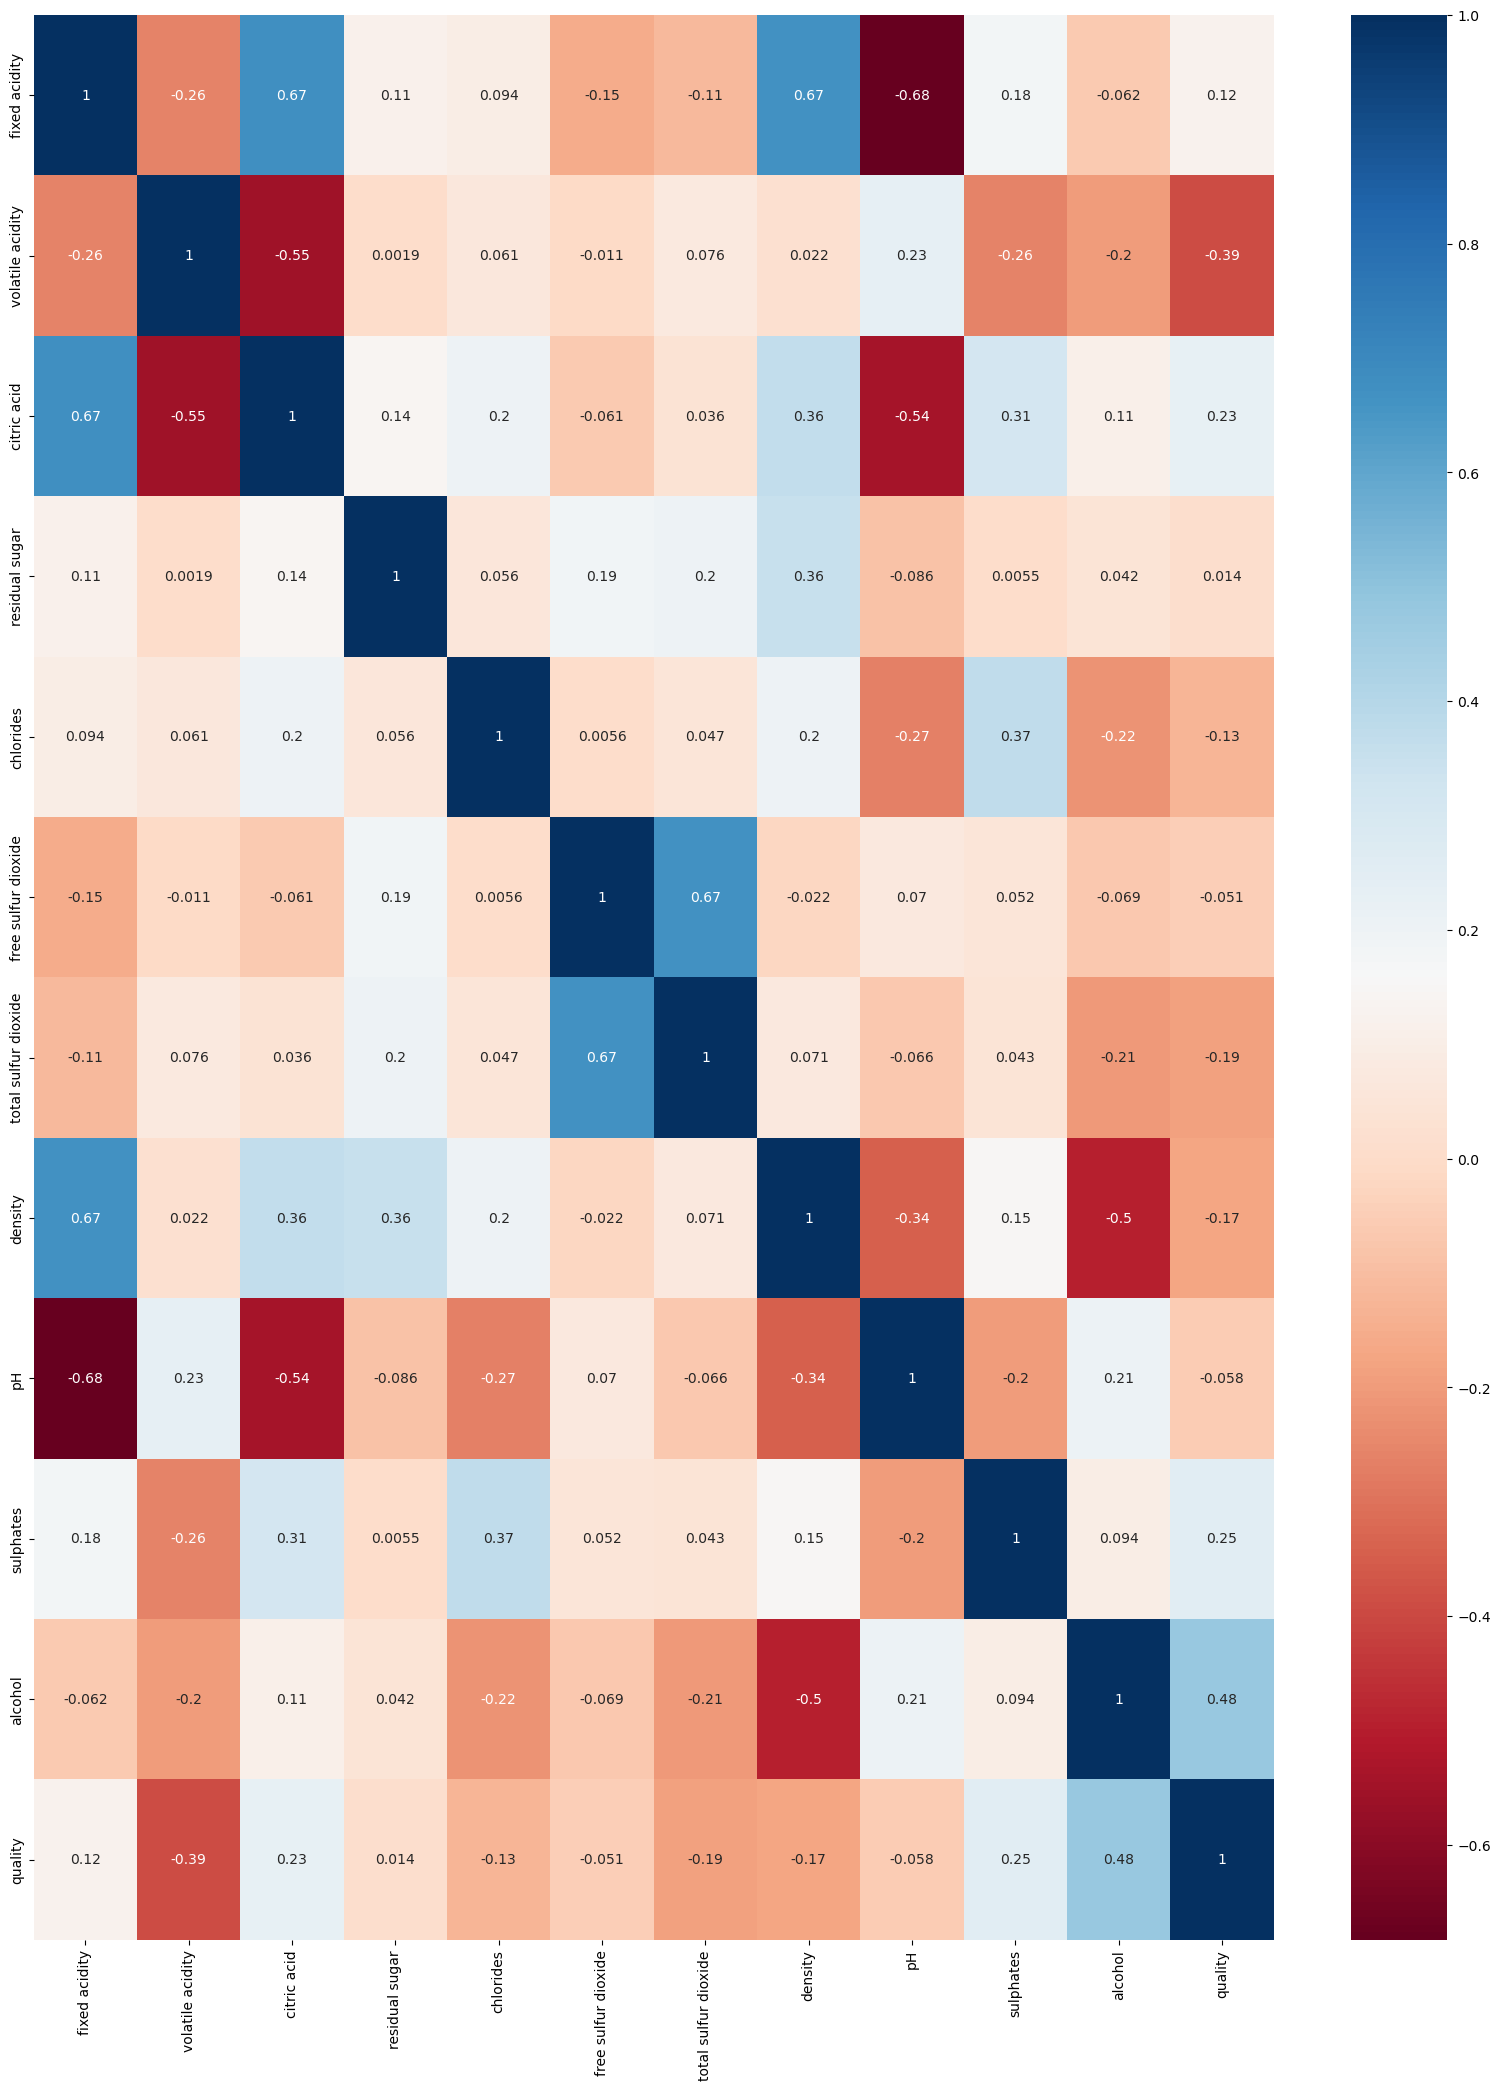

In [6]:
#Create corr  matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(20,25))
sns.heatmap(df.corr(), annot=True,cmap='RdBu')
plt.show()

#### The matrix above shows the correlation between each variable in the data. I wanted to simplify the analysis and training aspect of this project so i simply picked the variables with the highest correlation. 

#### Note that I did test the model including both volatile acidity and citric acid, but because the impact on model performance was nominal and because those features are not easily recognizable by looking at a bottle of wine, I excluded them from the training. 

## Create data set with our target features

In [15]:
# Remove all features besides alc, suphates and quality
df_small = df[['sulphates','alcohol','quality']]
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sulphates  1599 non-null   float64
 1   alcohol    1599 non-null   float64
 2   quality    1599 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 37.6 KB


## Create training and test data sets

In [16]:
#Use train_test_split to create new data sets for training and testing
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(0)
df_train,df_test=train_test_split(df_small,train_size=0.7,test_size=0.3,random_state=100)

In [11]:
#check out the resulting training data set
df_train.describe()

,sulphates,alcohol,quality
count,1119.000000,1119.000000,1119.000000
mean,0.656363,10.391257,5.640751
std,0.165313,1.055530,0.811138
min,0.370000,8.400000,3.000000
25%,0.550000,9.500000,5.000000
50%,0.620000,10.100000,6.000000
75%,0.730000,11.000000,6.000000
max,2.000000,14.000000,8.000000


### Scale data values
#### To normalize our data but keep the variances consistent, we'll user minmaxscaler to scale our features from 0-1, hoping that the consistency provides a boost in accuracy. Scaling data did end up causing usability issues with my application, which had to be resolved with some work arounds.

In [17]:
#scale training data and check results
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df_train[:]=scaler.fit_transform(df_train[:])
df_train.describe()

,sulphates,alcohol,quality
count,1119.000000,1119.000000,1119.000000
mean,0.175683,0.355582,0.528150
std,0.101419,0.188488,0.162228
min,0.000000,0.000000,0.000000
25%,0.110429,0.196429,0.400000
50%,0.153374,0.303571,0.600000
75%,0.220859,0.464286,0.600000
max,1.000000,1.000000,1.000000


In [18]:
#remove quality from training x and create training y

y_train=df_train.pop('quality')
X_train=df_train


### Train linear regression model. 

##### since we're using all continuous variables, we'll use a simple linear regression model to test out our product

In [19]:
#train model on scaled data
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [20]:
#Before testing, we need to scale our test data and create testing data sets
df_test[:]=scaler.fit_transform(df_test[:])
y_test = df_test.pop('quality')
X_test = df_test


In [21]:
#run test data through our trained model
pred = lm.predict(X_test)

In [22]:
#put our predtions into a table with the actual values and get look at some values
df_t= pd.DataFrame({'Actual':y_test,'Predictions':pred})
df_t['Predictions']= round(df_t['Predictions'],2)
df_t.head(10)

,Actual,Predictions
1254,0.4,0.55
1087,0.6,0.57
822,0.4,0.48
1514,0.6,0.46
902,0.8,0.55
1150,0.8,0.69
1441,0.6,0.44
354,0.6,0.60
1153,0.6,0.56
1005,0.8,0.64


### Check model performance
##### To check model performance, we'll use Mean squared error and R squared as our core metrics. The goal is to minimize MSE and maximize R2

In [29]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

Mean absolute error = 0.11
Mean squared error = 0.02
Median absolute error = 0.08
Explain variance score = 0.26
R2 score = 0.26


#### These results are a little conflicting to me as we got the loses MSE but also a very low R2. As mentioned above, I tested the model out a few different times while including other features. This configuration got me the lowest MSE (.138) out of my tests. Because my goal is to build out the full stack project, im going to continue with the model as is for now

### Test out and package model
##### I used the cell below to test out different input values and checked the result. this became imporant when i got to calling the model in my application and reducing debugging there


In [26]:
#test model inputs
lm.predict([[1,.1]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.69272837])

In [27]:
#Package the model using pickle

In [92]:
import pickle
pickle.dump(lm, open('model.pkl','wb'))